<a href="https://colab.research.google.com/github/jayoung977/2020Practice/blob/master/mask_detection(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

plt.style.use('dark_background')

##Load Models


In [3]:
facenet = cv2.dnn.readNet('/content/drive/My Drive/mask_detection/models/deploy.prototxt','/content/drive/My Drive/mask_detection/models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('/content/drive/My Drive/mask_detection/models/mask_detector.model')


##Load lmage

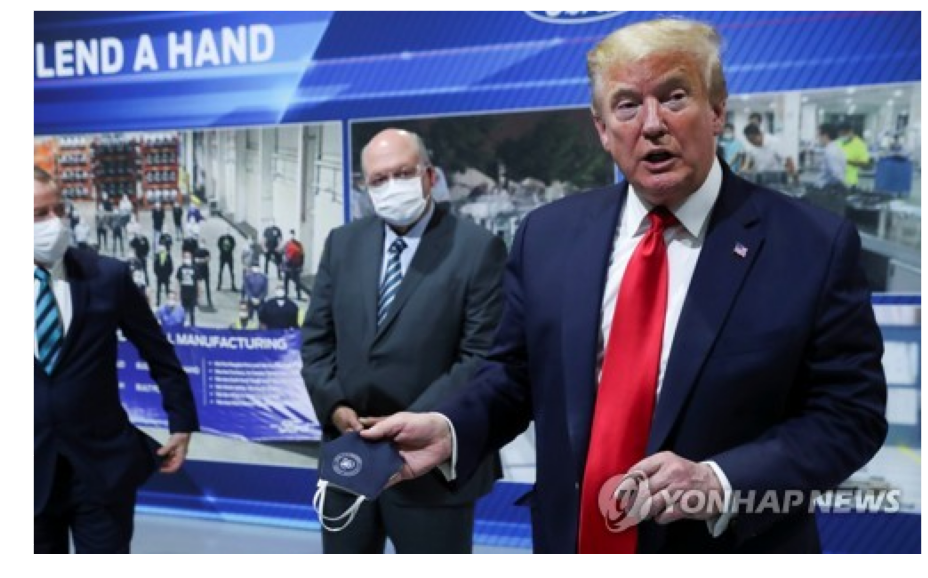

In [6]:
img = cv2.imread('/content/drive/My Drive/mask_detection/imgs/02.jpg')
h, w = img.shape[:2]

plt.figure(figsize=(16,10))
plt.imshow(img[:,:, ::-1])

##Preprocess Image for Face Detection

In [7]:
blob = cv2.dnn.blobFromImage(img,scalefactor=1.,size=(300,300), mean=(104., 177., 123.))
facenet.setInput(blob)
dets = facenet. forward()

##Detetect Faces

In [17]:
faces = []

for i in range(dets.shape[2]):
  confidence = dets[0, 0, i, 2]
  if confidence < 0.5:
    continue

    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)
    x2 = int(dets[0, 0, i, 5] * w)
    y2 = int(dets[0, 0, i, 6] * h)
    
    face = img[y1:y2, x1:x2]
    faces.append(face)

plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
  plt.subplot(1, len(faces), i+1)
  plt.imshow(face[:, :, ::-1])


<Figure size 1152x360 with 0 Axes>

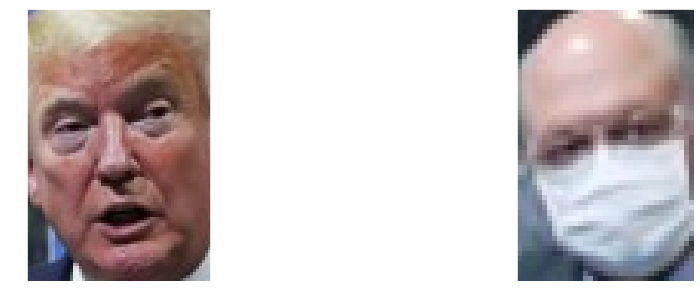

In [13]:
faces = []

for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]
    if confidence < 0.5:
        continue

    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)
    x2 = int(dets[0, 0, i, 5] * w)
    y2 = int(dets[0, 0, i, 6] * h)
    
    face = img[y1:y2, x1:x2]
    faces.append(face)

plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])